In [1]:
import torch.nn as nn
import torch
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision.transforms import transforms as T
from torch import optim
from tqdm import tqdm
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data1 = pd.read_csv("podaci_VV_popunjeno.csv")

In [3]:
data1.isna().sum()

DateTime                                        0
T                                               0
P                                               0
U                                               0
Ff                                              0
Nh                                              0
H                                           53192
VV                                              0
sss                                             0
DD_Calm, no wind                                0
DD_Wind blowing from the east                   0
DD_Wind blowing from the east-northeast         0
DD_Wind blowing from the east-southeast         0
DD_Wind blowing from the north                  0
DD_Wind blowing from the north-east             0
DD_Wind blowing from the north-northeast        0
DD_Wind blowing from the north-northwest        0
DD_Wind blowing from the north-west             0
DD_Wind blowing from the south                  0
DD_Wind blowing from the south-east             0


In [4]:
y = data1["H"]

In [5]:
y = y.dropna()

In [6]:
len(y)

25274

In [7]:
y

34884    2600.0
34886    2600.0
34888    2600.0
34889    1750.0
34890    1250.0
          ...  
78450    1750.0
78456    1750.0
78457    1750.0
78458    1750.0
78459    1750.0
Name: H, Length: 25274, dtype: float64

In [8]:
X = data1.dropna(subset=["H"])

In [9]:
X.describe(include='all')

,DateTime,T,P,U,Ff,Nh,H,VV,sss,"DD_Calm, no wind",...,DD_Wind blowing from the north-west,DD_Wind blowing from the south,DD_Wind blowing from the south-east,DD_Wind blowing from the south-southeast,DD_Wind blowing from the south-southwest,DD_Wind blowing from the south-west,DD_Wind blowing from the west,DD_Wind blowing from the west-northwest,DD_Wind blowing from the west-southwest,DD_variable wind direction
count,25274,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,...,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000
unique,25274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-12-25 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.109961,1008.839539,73.664359,3.100182,46.115375,1538.934280,12.905393,0.041663,0.061367,...,0.066432,0.059152,0.079410,0.042811,0.033275,0.041347,0.149007,0.071259,0.056540,0.000712
std,NaN,9.546308,46.240537,19.825334,2.171352,34.681888,915.515122,6.962539,0.906483,0.240008,...,0.249040,0.235913,0.270382,0.202434,0.179358,0.199095,0.356102,0.257262,0.230967,0.026678
min,NaN,-16.100000,742.700000,16.000000,0.000000,0.000000,25.000000,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.200000,1011.300000,58.000000,2.000000,5.000000,800.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,11.700000,1016.100000,78.000000,3.000000,50.000000,1750.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,19.400000,1021.900000,91.000000,4.000000,75.000000,2600.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
X = X.drop(["H"], axis = 1)

In [11]:
X.describe()

,T,P,U,Ff,Nh,VV,sss,"DD_Calm, no wind",DD_Wind blowing from the east,DD_Wind blowing from the east-northeast,...,DD_Wind blowing from the north-west,DD_Wind blowing from the south,DD_Wind blowing from the south-east,DD_Wind blowing from the south-southeast,DD_Wind blowing from the south-southwest,DD_Wind blowing from the south-west,DD_Wind blowing from the west,DD_Wind blowing from the west-northwest,DD_Wind blowing from the west-southwest,DD_variable wind direction
count,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,...,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000,25274.000000
mean,12.109961,1008.839539,73.664359,3.100182,46.115375,12.905393,0.041663,0.061367,0.064414,0.030703,...,0.066432,0.059152,0.079410,0.042811,0.033275,0.041347,0.149007,0.071259,0.056540,0.000712
std,9.546308,46.240537,19.825334,2.171352,34.681888,6.962539,0.906483,0.240008,0.245494,0.172517,...,0.249040,0.235913,0.270382,0.202434,0.179358,0.199095,0.356102,0.257262,0.230967,0.026678
min,-16.100000,742.700000,16.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,1011.300000,58.000000,2.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.700000,1016.100000,78.000000,3.000000,50.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.400000,1021.900000,91.000000,4.000000,75.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.400000,1048.300000,100.000000,17.000000,100.000000,71.000000,44.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, test_size = 0.2)

In [13]:
class FillModel(nn.Module):
    def __init__(self):
        super(FillModel, self).__init__()
                    
        self.fnn = nn.Sequential(
            nn.Linear(25, 64),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(p = 0.2),

            nn.Linear(32, 1),
            nn.ReLU(),
        )
        
    def forward(self, input):
        return self.fnn(input)

In [14]:
def trainLoop(fnn, trainLoader):
    fnn.train()
    optimizer = optim.Adam(fnn.parameters(), lr = 1e-5)
    criterion = torch.nn.MSELoss()
    
    i = 0
    counterTrain = []
    lossHistoryTrain = []

    j = 0
    counterVal = []
    lossHistoryVal = []
    epochsSinceLastImprovement = 0
    bestLoss = None
    
    for epoch in tqdm(range(60)):
        
        epochLoss = 0
        
        for batch_idx, (data, target) in enumerate(trainLoader):

            optimizer.zero_grad()

            data, target = data.to(device), target.to(device)

            #print(data.shape)
            output = fnn(data)

            loss = criterion(output, target)
            epochLoss += loss.item()
            loss.backward()
            optimizer.step()
        
        counterTrain.append(epoch)
        lossHistoryTrain.append(epochLoss/len(trainLoader))

    plt.plot(counterTrain, lossHistoryTrain)
    plt.show()
    
        

In [15]:
def testLoop(fnn, testLoader):
    fnn.eval()
    test_loss = 0
    
    optimizer = optim.Adam(fnn.parameters())
    criterion = torch.nn.MSELoss()
    
    with torch.no_grad():
        for data, target in testLoader:
            data, target = data.to(device), target.to(device)
            output = fnn(data)
            test_loss += criterion(output, target)

    test_loss /= len(testLoader.dataset)

    print(test_loss)

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
model = FillModel()
model.to(device)

FillModel(
  (fnn): Sequential(
    (0): Linear(in_features=25, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): ReLU()
  )
)

In [18]:
y_train = [[y] for y in y_train]
y_train = torch.Tensor(y_train)

In [19]:
X_train = X_train.values

In [20]:
X_train = [x[1:] for x in X_train]

In [21]:
X_train = torch.Tensor(X_train)

In [22]:
train = data_utils.TensorDataset(X_train, y_train)

In [23]:
y_test = [[y] for y in y_test]
y_test = torch.Tensor(y_test)

In [24]:
X_test = X_test.values

In [25]:
X_test = [x[1:] for x in X_test]

In [26]:
X_test = torch.Tensor(X_test)

In [27]:
test = data_utils.TensorDataset(X_test, y_test)

In [28]:
trainLoader = DataLoader(train,
                                      shuffle=True,
                                      num_workers=0,
                                      batch_size=32)
                                      #pin_memory=True)

In [29]:
testLoader = DataLoader(test,
                                      shuffle=True,
                                      num_workers=0,
                                      batch_size=32)
                                      #pin_memory=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:27<00:00,  1.46s/it]


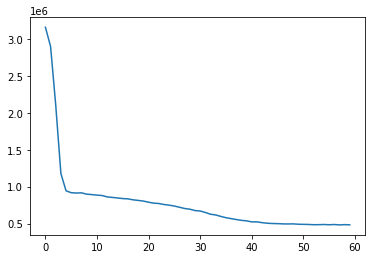

In [30]:
trainLoop(model, trainLoader)

In [31]:
testLoop(model, testLoader)

tensor(11947.4443, device='cuda:0')


In [32]:
torch.save(model.state_dict(), "modelH")